# Cardiotocographic Diagnonsis Model with Artificial Neural Networks

The objective of this learning is to build an artificial neural network model to help clinicians in screening pregnancies / foetuses to identify those which potentially have issues so that they can receive further medical attention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

The Cardiotocography dataset is a  recording of the fetal heart rate obtained by ultrasound and is used during pregnancy to assess fetal well‐being. These variables would be used to predict the target variable (NSP), which is the Fetal State Class code - or in other words, the diagnosis.

In [3]:
dataset = pd.read_csv("Cardiotocographic.csv")
dataset.head()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


This recording consists of variables such as:
BPM Beat per minutes
APC (Accelerations per second), 
FMPS (Fetal movement per second), 
UCPS (Uterine contractions per second), 
DLPS (Light declaration per second), 
SDPS (Severe declaration per second), 
PDPS (Prolonged declaration per second), 
ASTV (% of abnormal short term Variability), 
MSTV (Mean of short term Variability), 
ALTV (% of abnormal long term Variability), 
MLTV (Mean of long term Variability), 
Width (Width of FHR Histogram), 
Min (Min Width of FHR Histogram), 
Max (Max Width of FHR Histogram), 
NSP (Fetal State Class code (N=normal (1); S=Suspect (2); P=Pathologic (3)))



In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPM     2126 non-null   int64  
 1   APC     2126 non-null   float64
 2   FMPS    2126 non-null   float64
 3   UCPS    2126 non-null   float64
 4   DLPS    2126 non-null   float64
 5   SDPS    2126 non-null   float64
 6   PDPS    2126 non-null   float64
 7   ASTV    2126 non-null   int64  
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   int64  
 10  MLTV    2126 non-null   float64
 11  Width   2126 non-null   int64  
 12  Min     2126 non-null   int64  
 13  Max     2126 non-null   int64  
 14  NSP     2126 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 249.3 KB


In [5]:
dataset.shape

(2126, 15)

In [7]:
dataset['NSP'].value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


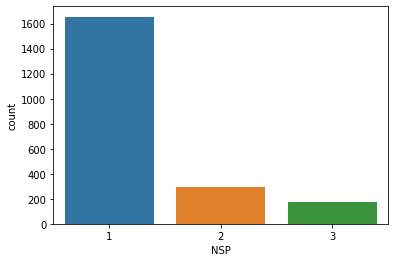

In [9]:
sns.countplot(dataset['NSP'])

There is an imbalance of classes in the test dataset, consequently in the training we would address this with the class-weights parameter

In [13]:
X = dataset.iloc[:,:14]
Y = dataset.iloc[:,14] - 1

In [19]:
#Split datset into test and train datasets. We would use 20% of the dataset as the test dataset.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, stratify = Y, random_state=99) #Stratify parameter "stratify=Y" makes sure we have the same proportion of classes in the train and test datasets as the inut dataset

X_train


,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max
1201,143,0.004233,0.000000,0.005291,0.000000,0.0,0.000000,44,0.9,6,9.4,43,130,173
2119,140,0.000000,0.000000,0.006764,0.001127,0.0,0.000000,79,0.6,27,6.4,26,124,150
480,140,0.000000,0.000000,0.001488,0.000000,0.0,0.000000,60,0.8,32,11.2,120,79,199
683,132,0.000000,0.297959,0.002041,0.002041,0.0,0.004082,37,2.3,0,0.0,111,54,165
349,141,0.000000,0.018828,0.002092,0.000000,0.0,0.000000,78,0.2,49,4.8,10,136,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,149,0.001705,0.000000,0.009378,0.000853,0.0,0.000000,37,1.1,10,6.6,71,104,175
222,129,0.002132,0.012793,0.000000,0.000000,0.0,0.000000,47,0.9,0,17.3,104,52,156
1030,135,0.003200,0.000000,0.003200,0.004800,0.0,0.000000,23,1.6,0,9.1,67,90,157
357,130,0.002132,0.008529,0.000000,0.000000,0.0,0.000000,46,1.2,0,16.2,95,60,155


In [22]:
X_test

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max
1094,122,0.017668,0.000000,0.001767,0.000000,0.0,0.0,22,2.5,0,2.2,52,100,152
2051,127,0.002587,0.016818,0.005175,0.000000,0.0,0.0,66,4.2,5,0.3,23,123,146
627,120,0.003336,0.000000,0.001668,0.000834,0.0,0.0,46,1.5,11,19.0,132,57,189
1453,148,0.001972,0.000000,0.007890,0.000000,0.0,0.0,44,0.9,15,9.6,60,135,195
1227,125,0.000000,0.000000,0.004831,0.000000,0.0,0.0,45,0.7,33,7.7,19,122,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,132,0.002410,0.007229,0.004819,0.000000,0.0,0.0,51,0.7,0,12.3,41,115,156
1263,119,0.004444,0.000000,0.007407,0.001481,0.0,0.0,23,1.5,5,7.9,75,70,145
446,142,0.000000,0.005859,0.000000,0.000000,0.0,0.0,69,0.3,39,6.5,14,137,151
1077,134,0.002473,0.000000,0.009893,0.004946,0.0,0.0,26,1.8,10,15.1,82,82,164


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train


array([[ 0.99681864,  0.2727628 , -0.2031878 , ..., -0.71252196,
         1.24111952,  0.49582716],
       [ 0.69088044, -0.83040525, -0.2031878 , ..., -1.14642812,
         1.03903119, -0.7807988 ],
       [ 0.69088044, -0.83040525, -0.2031878 , ...,  1.25281771,
        -0.47663126,  1.93896954],
       ...,
       [ 0.18098344,  0.00358984, -0.2031878 , ..., -0.09994856,
        -0.106136  , -0.39226047],
       [-0.32891356, -0.27470494, -0.02708045, ...,  0.61472041,
        -1.11657764, -0.50327142],
       [ 1.50671564, -0.83040525, -0.2031878 , ..., -1.29957147,
         1.91474728,  0.32931073]])

In [26]:
#Build and Train the Neural Network

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,activation='relu',input_shape=(14,))) 
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [27]:
#Compile the model

model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy"
            ) 
# Optimizer how fast the network ‘learns’ – i.e., how quickly it updates the weights in the network. 
#If it’s too sensitive, it will update the weights too much based on the current training examples, 
#meaning the values jump around and it doesn’t converge. If it’s not sensitive enough, it will take 
#much longer to train. A common optimizer is Adam.

# Loss loss is a function which is used to calculate how big the error is in the 
#neural network’s predictions. When it is being trained, the weights in the neural 
#network are updated to try and minimize the loss. Categorical cross entropy is 
#typically the loss function we use for classification.

In [28]:
#View summary of neural network built

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 120       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Train the model

#Use class weigh to address imbalance of classes
class_weights = {0:1, 1:6, 2:7} 

history = model.fit(X_train, Y_train, 
                    batch_size = 8, 
                    epochs= 50, 
                    verbose=2, 
                    class_weight=class_weights, 
                    validation_split=0.2
                  )

#Batch_size = 8, instructus to feed 8 trainig examples through the network in one go before updating the weights.
#epochs: In one epoch, all the training data is passed through the network once. Epochs = 50, passed through the network 50 times
#verbose: This determines how much information we are given on the training and setting this to 2 outputs more detailed information as we go through the training.
#validation_split: This determines how much data is left out of the training data and used to calculate the validation metrics during each epoch.

Epoch 1/50
170/170 - 3s - loss: 2.7651 - accuracy: 0.4574 - val_loss: 1.0116 - val_accuracy: 0.5559 - 3s/epoch - 18ms/step
Epoch 2/50
170/170 - 0s - loss: 2.2243 - accuracy: 0.5816 - val_loss: 0.8957 - val_accuracy: 0.6500 - 391ms/epoch - 2ms/step
Epoch 3/50
170/170 - 0s - loss: 1.9397 - accuracy: 0.6551 - val_loss: 0.8158 - val_accuracy: 0.7088 - 492ms/epoch - 3ms/step
Epoch 4/50
170/170 - 1s - loss: 1.7467 - accuracy: 0.7221 - val_loss: 0.7518 - val_accuracy: 0.7471 - 676ms/epoch - 4ms/step
Epoch 5/50
170/170 - 0s - loss: 1.5783 - accuracy: 0.7478 - val_loss: 0.6917 - val_accuracy: 0.7559 - 368ms/epoch - 2ms/step
Epoch 6/50
170/170 - 0s - loss: 1.4463 - accuracy: 0.7588 - val_loss: 0.6393 - val_accuracy: 0.7706 - 376ms/epoch - 2ms/step
Epoch 7/50
170/170 - 0s - loss: 1.3375 - accuracy: 0.7779 - val_loss: 0.5875 - val_accuracy: 0.7912 - 379ms/epoch - 2ms/step
Epoch 8/50
170/170 - 1s - loss: 1.2478 - accuracy: 0.7971 - val_loss: 0.5447 - val_accuracy: 0.8029 - 614ms/epoch - 4ms/step
Ep

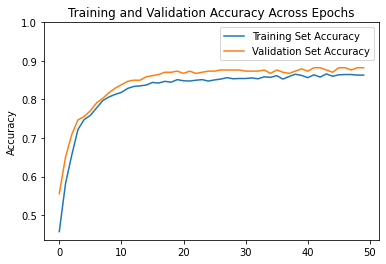

In [37]:
#Evaluating Model

accuracy = history.history['accuracy'] 
validation_accuracy = history.history['val_accuracy'] 
plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()
plt.show()

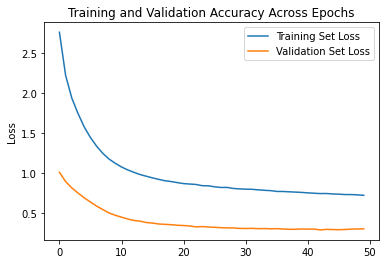

In [32]:
loss = history.history['loss'] 
validation_loss = history.history['val_loss'] 
plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
#Use Model to run prediction on test dataset X_test

Y_pred = model.predict(X_test) 
Y_pred = Y_pred.argmax(axis=1) #Return class with highest probability
Y_pred

14/14 [==============================] - 0s 2ms/step


array([0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,

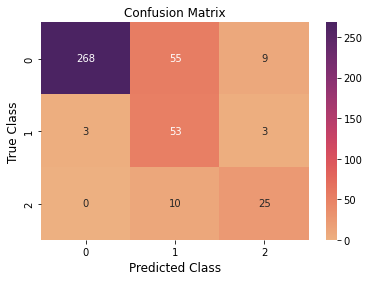

In [35]:
#Display confusion Matrix chart

confusion_matrix = confusion_matrix(Y_test,Y_pred) 
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d') 
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

In [38]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       332
           1       0.45      0.90      0.60        59
           2       0.68      0.71      0.69        35

    accuracy                           0.81       426
   macro avg       0.70      0.81      0.73       426
weighted avg       0.89      0.81      0.83       426

